In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.stats import chi2_contingency
import math
import random

Đọc dữ liệu và show thông tin

In [ ]:
df = pd.read_csv("D:\Code\Python Code\data\customer-v2.csv")
df.loc[df.PHUONGXA == "Thị Trấn Phong Điền", "PHUONGXA"] = "TT Phong Điền"

In [ ]:
label_value_count = df['THANHLY'].value_counts()
print(label_value_count[0], label_value_count[0]/3217*100)
print(label_value_count[1], label_value_count[1]/3217*100)

In [ ]:
df.describe()

In [ ]:
# chuyen cac cot chua gia tri (0, 1) thanh object
df[['LOAIKHACHHANG', 'KHAOSATLAPMOI', 'KHAOSATLAPMOIHAILONG', 'KHAOSATLAPMOIKHONGHAILONG', 'HINHTHUCTHANHTOAN', 'THANHLY']] = df[['LOAIKHACHHANG', 'KHAOSATLAPMOI', 'KHAOSATLAPMOIHAILONG', 'KHAOSATLAPMOIKHONGHAILONG', 'HINHTHUCTHANHTOAN', 'THANHLY']].astype('object')
print(df.dtypes)

In [ ]:
print('The Numerical variables are ')
print(list(df.select_dtypes(include=np.number).columns.values))
num_col= df.select_dtypes(include=np.number).columns.values
print('The Categorical variables are ')
print(list(df.select_dtypes(include=[np.dtype("object")]).columns.values))
cat_col= df.select_dtypes(include=[np.dtype("object")]).columns.values

In [80]:
print(num_col)

['MAKHACHHANG' 'SODICHVU' 'SOLANBAOHONG' 'SOLANGOIKIEMBAOHONG'
 'SOLANBAOHONGHAILONG' 'SOLANBAOHONGKHONGHAILONG' 'SOLANCHAMSOC'
 'SOLANTAMNGUNG' 'SOTHANGSUDUNGDICHVU' 'GIADICHVU' 'KHONGPHATSINHLUULUONG'
 'DIEMTINNHIEM']


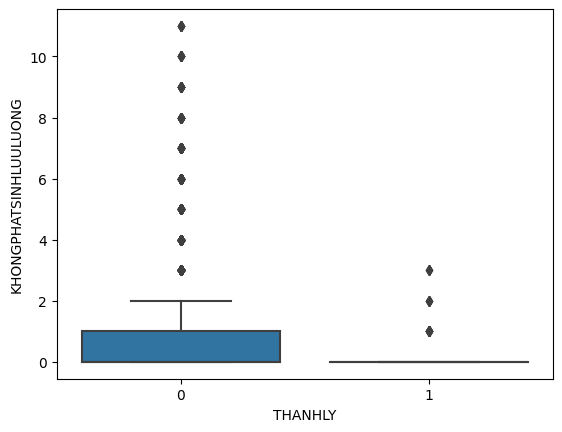

In [87]:
ax = sns.boxplot(x=df['THANHLY'], y=df['KHONGPHATSINHLUULUONG'])

In [ ]:
temp = df.columns
temp2 = temp.drop(labels='THANHLY')
print(temp2)
# temp2 = random.choices(temp, k=1)

# Chia dataset và mã hóa

In [ ]:
temp = df.columns
temp2 = temp.drop(labels='THANHLY')
temp3 = random.choices(temp2, k=4)
X = df.loc[:, temp3] # features
y = df.iloc[:, -1] # label
one_hot_encode = OneHotEncoder(sparse=False)
for feature in X.columns:
    if (X[feature].dtype == 'object'):
        dummy = pd.get_dummies(X[feature], prefix=feature)
        X = pd.concat([X, dummy], axis=1)
        del X[feature]
print(X.info())

In [ ]:
classifier_algorithms = {
    "K Nearest Neighbors": KNeighborsClassifier(), 
    "Naive Bayes": GaussianNB(), 
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=0), 
    "Random Forest": RandomForestClassifier(n_estimators=10, random_state=0), 
    "Logistic Regression": LogisticRegression(random_state=0),
}
model = classifier_algorithms["Logistic Regression"]
scoring = ("accuracy", "f1_micro")
k_fold = KFold(n_splits=10, random_state=0, shuffle=True)
scores = cross_validate(model, np.array(X), y, scoring=scoring, cv=k_fold)
print('test_accuracy', scores['test_accuracy'])
print('test_f1_micro', scores['test_f1_micro'])
print('test_accuracy', sum(scores['test_accuracy']) / len(scores['test_accuracy']))
print('test_f1_micro', sum(scores['test_f1_micro']) / len(scores['test_f1_micro']))

In [ ]:
 #InvalidParameterError: The 'scoring' parameter of check_scoring must be a str among {'precision', 'f1_macro', 'rand_score', 'jaccard_weighted', 'precision_macro', 'adjusted_rand_score', 'f1', 'adjusted_mutual_info_score', 'average_precision', 'r2', 'completeness_score', 'precision_samples', 'positive_likelihood_ratio', 'roc_auc_ovr_weighted', 'recall', 'f1_micro', 'precision_weighted', 'roc_auc_ovo_weighted', 'jaccard_samples', 'mutual_info_score', 'explained_variance', 'jaccard', 'homogeneity_score', 'neg_mean_gamma_deviance', 'neg_root_mean_squared_error', 'recall_macro', 'recall_micro', 'recall_samples', 'f1_samples', 'jaccard_macro', 'neg_brier_score', 'neg_negative_likelihood_ratio', 'neg_mean_absolute_error', 'precision_micro', 'roc_auc', 'fowlkes_mallows_score', 'accuracy', 'f1_weighted', 'neg_log_loss', 'recall_weighted', 'neg_mean_absolute_percentage_error', 'max_error', 'roc_auc_ovr', 'roc_auc_ovo', 'neg_mean_poisson_deviance', 'balanced_accuracy', 'matthews_corrcoef', 'top_k_accuracy', 'neg_median_absolute_error', 'neg_mean_squared_error', 'jaccard_micro', 'normalized_mutual_info_score', 'v_measure_score', 'neg_mean_squared_log_error'}, a callable or None. Got ['accuracy_score', 'f1_score'] instead.